# 2. Redes neuronales 101

¡Bienvenidos a la segunda sesión! Tras haber visto una pequeña introducción al Deep Learning, haber conocido a nuestro super héroe el gradient descent y haber jugado un poco con TensorFlow hasta haber implementado una red neuronal, en la sesión de hoy vamos  hacer un pequeñísimo repaso de qué es y cómo funciona una red neuronal, luego vamos a estudiar detenidamente cómo aprenden y, por último, resolveréis vuestro primer problema real haciendo uso de redes neuronales con TensorFlow.

El temario de hoy es el siguiente:

**Redes neuronales 1**
* Introducción. Para qué sirven y para qué no
* ¿Cómo aprenden las redes neuronales? Forward- and Back-propagation
* Implementación del Gradient Descent en una red neuronal con TensorFlow


## 2.1 Introducción

## 2.1.1. Introducción. Para qué sirven y para qué no

Todos sabéis ya que una red neuronal es un método de aproximación de funciones. De hecho, según el teorma de aproximación universal:

**Una red neuronal con una sola capa oculta es suficiente para representar cualquier función en un determinado rango de valores**, aunque es posible que dicha capa oculta sea tan grande que haga su implementación imposible o que no sea posible encontrar los pesos adecuados.

Si tenemos en cuenta que normalmente cualquier problema que se os ocurra puede ser descompuesto y modelado en forma de funciones matemáticas, de acuerdo con este teorema, las redes neuronales deberían ser capaces de resolver cualquier problema, ¿no?

Bueno, hay dos limitaciones importantes de las redes neuronales: 
* son capaces de aproximar funciones **continuas** 
* en un determinado **rango** de valores

A grandes rasgos, con una red neuronal podemos **detectar patrones** y utilizarlos para resolver problemas. Además, con las **redes neuronales profundas** conseguimos transformar el espacio de los datos hasta que encontramos una representación que facilita la consecución de la tarea perseguida. Mirad:

<img src="https://image.ibb.co/kfu8oy/data_blending.png" alt="data_blending" border="0" width="500">
<img src="https://image.ibb.co/bSrooy/data_blending_mnist.png" alt="data_blending_mnist" border="0"  width="520">

¿Os dáis cuenta de cómo transforman los datos de entrada para coneguir diferenciarlos más fácilmente?

Fijaos en este ejemplo:

<img src="http://cs231n.github.io/assets/eg/spiral_raw.png" border="0" height="300">

Si tratásemos de solucionarlo con un clasificador lineal, por ejemplo, sería muy complicado, ya que los datos no son linealmente separables. Una posible solución sería esta:

<img src="http://cs231n.github.io/assets/eg/spiral_linear.png" border="0" height="300">

Pero como podéis ver, no es demasiado buena... Queréis ver lo que sería capaz de hacer una red neuronal?

<img src="http://cs231n.github.io/assets/eg/spiral_net.png" border="0" height="300">

(Fuente: http://cs231n.github.io/neural-networks-case-study/)

Nada mal, eh!?

Vale, pero entonces, **¿qué es lo que no se puede hacer con redes neuronales?**

En general, dar soluciones **exactas** a un problema. Por ejemplo, una red neuronal lo pasaría realmente mal para conseguir implementar la multiplicación. Primero, porque le exigiríamos valores exactos, y segundo, porque como hemos dicho antes, son capaces de aproximar funciones en un rango determinado. La multiplicación exigiría un rango de [-inf, +inf].

Además, **tampoco pueden "pensar"**. No son más que detectores muy potentes de patrones que dan la sensación de **inteligencia**, pero **no la tienen**. La inteligencia la tenemos que poner **nosotros**.

También hay que tener en cuenta que aunque son muy útiles porque resuelven problemas hasta ahora muy complejos para un ordenador, como por ejemplo, detectar distintos tipos de razas de perro o señales de tráfico, es muy difícil extraer ese conocimiento de ellas. Es decir, son capaces de hacer lo que les pidamos, pero es complicado averiguar cómo exáctamente lo están haciendo.

Continuando con el ejemplo de las señales de tráfico: podemos lograr una precisión de +99%, y sin embargo, saber en qué se fija la red para tomar sus decisiones es complicado. Aún así, se están haciendo esfuerzos para visualizar los filtros aprendidos y las salidas de cada capa de la red, de forma que podemos intuir cómo funcionan fijándonos en dónde prestan más atención.

**¿Tenéis curiosidad? Pensad en algún problema y vamos a ver si se podría resolver con redes neuronales o no.**

## 2.2 ¿Cómo aprenden las redes neuronales?

<img src="https://image.ibb.co/mHZ1Hd/como_aprende_red.png" alt="como_aprende_red" border="0" height="400">

Pues si, exactamente igual que nosotros! Las redes aprenden por repetición. Ven cosas, y algo les dice si lo que creen que son esas cosas está bien o no. En caso de que no esté bien, varían su conocimiento para tratar de no repetir el mismo error.

**Veamos un ejemplo más concreto:**

Como sabéis, las redes estan formadas por capas, que a su vez están formadas por neuronas. En esta imagen podemos ver una red de tipo feed-forward con una primera capa de 2 neuronas, una capa oculta de 2 neuronas y una capa de salida de otras 2 neuronas. Además, la capa interna y la de salida tienen también bias.

<img src="https://image.ibb.co/mmk68y/net_1.png" alt="net_1" border="0">

Existen muchas más arquitecturas, pero esta es la más utilizada. En este tipo de arquitecturas, cada neurona de la capa $i$ se conecta con todas las neuronas de la capa $i+1$. Es decir, que a las neuronas de una capa solo se les permite conectarse con neuronas de la siguiente capa. Este tipo de capas se conocen como capas **densas** o **fully connected**.

Cuando las conexiones hacia detrás estan permitidas, se llaman redes recurrentes. Pero esto lo veremos con más detalle en una sesión posterior.

Volviendo a lo nuestro: por simplicidad, vamos a suponer que nuestro training set se compone solo de 1 elemento: 0.05, 0.1, que es de clase 1 (podría ser de clase 0, si la probabilidad de la neurona o1 es mayor que la de la neurona o2, o de clase 1 si ocurre lo contrario). En la siguiente imagen podéis ver la red con los pesos inicializados aleatoriamente, el elemento del training set a la entrada, y la salida deseada:

<img src="https://image.ibb.co/g7C8MJ/net_2.png" alt="net_2" border="0">

Vale, pues ya tenemos nuestra red definida y lista para entrenar. Pero... ¿cómo aprende una red?

Mediante el **forward pass** y el backward pass o **backpropagation**.

¿Vale, y eso qué es?

### El "Forward pass"

El feed-forward o pasada hacia delante consiste en calcular la salida de nuestra red con los valores actuales de los pesos. Para ello, siguiendo con nuestro ejemplo, lo que hacemos es alimentar (feed forward) la red con nuestro elemento de entrenamiento.

Pero antes de nada, vamos a ver cómo es realmente **una neurona**:

<img src="https://image.ibb.co/dq0sFd/net_3_neuron.png" alt="net_3_neuron" border="0">

$$in_{h1} = i1\cdot w1 + i2\cdot w2 + 1 \cdot b1$$

$$out_{h1} = \texttt{fn_activacion}(in_{h1}) = \texttt{fn_activation}(i1\cdot w1 + i2\cdot w2 + 1 \cdot b1)$$

Donde $\texttt{fn_activacion}$ es la función de activación elegida. Aquí podéis visualizar algunas de estas funciones, que luego veremos con más detalle:

<img src="https://image.ibb.co/gMG5kd/activation_functions.png" alt="activation_functions" border="0" width="600">

### Relación con la biología

Como muchos de vosotros ya sabéis, las redes neuronales están inspiradas en el cerebro humano. De hecho, en nuestro cerebro disponemos de más o menos 10 billones de neuronas, cada una conectada con otras 10.000 neuronas. 

<img src="https://image.ibb.co/cZtMad/net_4_bio.png" alt="net_4_bio" border="0">

<img src="https://image.ibb.co/jegAfo/math_model_neuron.jpg" alt="math_model_neuron" border="0" height="200">

El cuerpo de la neurona se llama **soma**, las entradas, **dendritas**, y las salidas, **axones**. La magia del cerebro está en las **miles y miles de conexiones** de unas dendritas con los axones de otras neuronas.

La forma de funcionar es que cada neurona recibe un impulso electroquímico de otras neuronas a través de sus axones (salidas) y las dendritas (entradas) de la receptora. Si estos impulsos son lo **suficientemente intensos** para activar la neurona, entonces esta neurona **pasa el impulso a sus conexiones**. Al hacer esto, cada una de las neuronas conectadas vuelve a comprobar si el impulso que le llega al soma a partir de las dendritas ($in_{h1}$ en nuestro ejemplo previo) es lo suficientemente fuerte como para activar la neurona ($\texttt{fn_activation}$ es la encargada de comprobar esto) y espandirse por más neuronas.

Teniendo en cuenta este modo de funcionamiento, nos damos cuenta de que realmente las neuronas son como un **interruptor**: o pasan el mensaje o no.

Es muy importante que entendáis que las redes neuronales no se *basan* en sus compañeras biológicas, si no que se **inspiran** en ellas.

### Forward y back propagation

Perfecto! Ya sabéis cómo funciona una neurona, ¿quién sería capaz ahora de decirme cuál es el resultado de $out_{h1}$ de nuestra red?

¡Venga! ¡Dadle a esas cabezas! Es simplemente sustituir ;-)

...

...


¡Vamos allá!

Lo primero, vamos a ver qué necesitamos calcular, por orden, que siempre está bien ser ordenado. Veamos primero nuestra red y la estructura de la neurona otra vez:

<img src="https://image.ibb.co/g7C8MJ/net_2.png" alt="net_2" border="0" height="200"> <img src="https://image.ibb.co/dq0sFd/net_3_neuron.png" alt="net_3_neuron" border="0" height="200">

De acuerdo con esto, para calcular o1 y o2 necesitamos:

Para la primera capa, la oculta:

* $in_{h1}$ y $out_{h1}$
* $in_{h2}$ y $out_{h2}$

Para la última capa, la de salida:

* $in_{o1}$ y $out_{o1}$
* $in_{o2}$ y $out_{o2}$

Donde o1 = $out_{o1}$ y o2 = $out_{o2}$. ¿Estamos de acuerdo hasta ahora?

Con lo cual, tenemos que calcular:

$$in_{h1} = w_1 \cdot i_1 + w_2 \cdot i_2 + b_1 \cdot 1$$

$$in_{h1} = 0.15 \cdot 0.05 + 0.2 \cdot 0.1 + 0.35 \cdot 1 = 0.3775$$

$$in_{h2} = w_3 \cdot i_1 + w_4 \cdot i_2 + b_1 \cdot 1$$

$$in_{h2} = 0.25 \cdot 0.05 + 0.3 \cdot 0.1 + 0.35 \cdot 1 = 0.3925$$



In [0]:
in_h1 = 0.15*0.05+0.2*0.1+0.35*1
print(in_h1)

0.3775


In [0]:
in_h2 = 0.25*0.05+0.3*0.1+0.35*1
print(in_h2)

0.39249999999999996


So far so good!

Ahora, para obtener $out_{h1}$ y $out_{h2}$, necesitamos aplicar la $\texttt{fn_activacion}$. En este caso hemos escogido la función de activación logística:

$$\texttt{fn_activacion}(x) = \frac{1}{1+e^{-x}}$$

Por lo tanto:

$$out_{h1} = \texttt{fn_activacion}(in_{h1}) = \frac{1}{1+e^{-in_{h1}}}=\frac{1}{1+e^{-0.3775}} = 0.5933$$

$$out_{h2} = \texttt{fn_activacion}(in_{h2}) = \frac{1}{1+e^{-in_{h2}}}=\frac{1}{1+e^{-0.3925}} = 0.5969$$

In [0]:
import numpy as np
out_h1 = 1 / (1+np.exp(-in_h1))
print(out_h1)

0.5932699921071872


In [0]:
out_h2 = 1 / (1+np.exp(-in_h2))
print(out_h2)

0.596884378259767


<img src="https://image.ibb.co/gPFbrJ/meme_excelente.jpg" alt="meme_excelente" border="0" width="200">

Vamos a ver cómo llevamos el cálculo de nuestra salida:

<img src="https://image.ibb.co/c21o5d/net_hidden_out.png" alt="net_hidden_out" border="0" width="350">

¡Solo nos queda calcular o1 y o2! Vamos allá:

$$in_{o1} = w_5 \cdot out_{h1} + w_6 \cdot out_{h2} + b_2 \cdot 1$$

$$in_{o1} = 0.40 \cdot 0.5933 + 0.45 \cdot 0.5969 + 0.60 \cdot 1 = 1.1059$$

$$in_{o2} = w_7 \cdot out_{h1} + w_8 \cdot out_{h2} + b_2 \cdot 1$$

$$in_{o2} = 0.50 \cdot 0.5933 + 0.55 \cdot 0.5969 + 0.60 \cdot 1 = 1.2250$$

Por lo tanto, aplicando la función de activación:

$$out_{o1} = \texttt{fn_activacion}(in_{o1}) = \frac{1}{1+e^{-in_{o1}}}=\frac{1}{1+e^{-1.1059}} = 0.7514$$

$$out_{o2} = \texttt{fn_activacion}(in_{o2}) = \frac{1}{1+e^{-in_{o2}}}=\frac{1}{1+e^{-1.2250}} = 0.7729$$

In [0]:
in_o1 = 0.40*0.5933+0.45*0.5969+0.60*1
print(in_o1)

1.105925


In [0]:
in_o2 = 0.50*0.5933+0.55*0.5969+0.60*1
print(in_o2)

1.224945


In [0]:
out_o1 = 1 / (1+np.exp(-in_o1))
print(out_o1)  # target_o1 = 0.01

0.751368625185488


In [0]:
out_o2 = 1 / (1+np.exp(-in_o2))
print(out_o2)  # target_o2 = 0.99

0.7729326066130681


¡Por fin! ¡Ya tenemos las predicciones de nuestra red neuronal calculadas! ¿Qué pasa? ¿No os convencen?

**Por supuesto que no, son pésimas!!!** ¡No se parecen en nada al 0.01 y 0.99 deseados! ¿Cómo arreglamos esto?

¿Qué os parece si **calculamos el error total** cometido y tratamos de **minimizarlo**? Parece lógico, ¿no? De hecho, es precisamente lo que hace el algoritmo de **backpropagation: actualizar los pesos en función de lo que influya cada peso en el error total para minimizarlo**?

Vamos a calcular el error total:

$$E_{total}=\frac{1}{2}\sum(target-output)^2 = E_{o1} + E_{o2}$$

$$E_{o1}=\frac{1}{2}\sum(target_{o1}-out_{o1})^2 = \frac{1}{2}\sum(0.01-0.7514)^2 = 0.2748$$

$$E_{o2}=\frac{1}{2}\sum(target_{o2}-out_{o2})^2 = \frac{1}{2}\sum(0.99-0.7729)^2 = 0.0236$$

$$E_{total} = 0.2748 + 0.0236 = 0.2984$$

Fijáos en cómo el error de $out_{o2}$ es mucho menor que el de $out_{o1}$. Esto se debe a que 0.7729 está mucho más cerca de 0.99 que 0.7514 de 0.01, con lo cual, el cambio debería ser mayor en las neuronas que intervienen en el cálculo de $out_{o1}$ que las de $out_{o2}$. Hasta aquí todo lógico, ¿verdad?

¿Y cómo podemos actualizar los pesos, cada uno en función de lo que influya en el error total? Muy sencillo, calculando cuanto influye un cambio en un determinado peso con respecto al error total, y actualizándolo teniendo en cuenta esta relación.

Por ejemplo, ¿se os ocurre alguna forma de cálcular cuanto influye el peso w5 en el error total? Mejor dicho, cuánto influye un cambio en el peso w5 en el error total? ¿No os suena de nada esto?

¡Exacto! ¡Estamos hablando de derivadas! Fijaos, podemos entender cada neurona como una función, y aplicar la **regla de la cadena** para llegar desde el error total hasta el peso w5. Pero antes, ¿os acordáis de cómo funciona la regla de la cadena?

Vamos a ver un ejemplo:

Imagináos que tenemos que derivar la función $y=(x^2 +1)^3$ respecto de $x$, es decir, queremos encontrar cuanto un cambio en $x$ afecta a la función $y$. 

Podemos entender esta función como una composición de 2 funciones, donde:

$u = x^2 + 1$

$y = u^3$

¿Lo véis, verdad? Vale, pues ahora necesitamos derivar $y$ con respecto de $x$. Para ello, primero necesitamos derivar $y$ con respecto a $u$, y luego $u$ con respecto a $x$:

$\frac{\partial y}{\partial x} = \frac{\partial y}{\partial u} \cdot \frac{\partial u}{\partial x}$

Vamos a verlo con nuestro ejemplo:

$\frac{\partial y}{\partial u} = 3 \cdot u^{3-1} \cdot u'=3 \cdot u^{3-1} \cdot 1 = 3u^2$

$\frac{\partial u}{\partial x} = 2x$

$\frac{\partial y}{\partial x} = \frac{\partial y}{\partial u} \cdot \frac{\partial u}{\partial x} = 3u^2 \cdot 2x = 3 \cdot (x^2+1)^2 \cdot 2x$

Pues esto, para los que no os acordárais o no lo supierais, es la regla de la cadena. ¿Fácil verdad?

Veamoslo ahora como si fuese un grafo:

<center><img src="https://image.ibb.co/kCTsAo/graph_abcde.png" alt="graph_abcde" border="0" height="50"></center>

Imaginad que cada círculo es una función y que cada flecha una multiplicación. Entonces, utilizando la regla de la cadena podríamos escribir:

$$\frac{\partial e}{\partial a} = \frac{\partial e}{\partial d} \cdot \frac{\partial d}{\partial c} \cdot \frac{\partial c}{\partial b} \cdot \frac{\partial b}{\partial a}$$ 

Pues ahora sí, tras recordar la regla de la cadena, veamos cómo podemos escribir la fórmula que nos indique cúanto cambia el $E_{total}$ en función del peso $w_5$:

<center><img src="https://image.ibb.co/dRbxgJ/net_out_out.png" alt="net_out_out" border="0"></center>
<center><img src="https://image.freepik.com/free-icon/arrow-bold-down-ios-7-interface-symbol_318-34310.jpg" alt="arrow" border="0" height="100"></center>
<center><img src="https://image.ibb.co/h6m06J/net_Etotal_Eo1_Eo2.png" alt="net_Etotal_Eo1_Eo2" border="0" height="300"></center>

Vayamos por partes. 

El error total se define como:

$$E_{total} = E_{o1} + E_{o2} = \frac{1}{2}\sum(target_{o1}-out_{o1})^2 + \frac{1}{2}\sum(target_{o2}-out_{o2})^2$$

En este caso, queremos llegar al peso $w_5$, verdad? Pues si os fijáis bien, el peso $w_5$ solo influye realmente en la neurona o1, así que solo nos importa el $E_{o1}$, lo que hace que nuestro $E_{total} = E_{o1}$. 

<center><img src="https://image.ibb.co/eihF6J/net_Etotal_Eo1_Eo2_after.png" alt="net_Etotal_Eo1_Eo2_after" border="0" height="300"></center>

Con lo cual, podemos definir la variación del peso $w_5$ con respecto al $E_{total}$ como:

$$\frac{\partial E_{total}}{\partial w_5} = \frac{\partial E_{total}}{\partial out_{o1}} \cdot \frac{\partial out_{o1}}{\partial in_{o1}} \cdot \frac{\partial in_{o1}}{\partial w_5}$$

Ahora necesitamos calcular su derivada con respecto a $out_{o1}$, que es lo que indica cuanto un cambio en $out_{o1}$ influye en el $E_{total}$:

$$\frac{\partial E_{total}}{\partial out_{o1}} = 2 \cdot \frac{1}{2}(target_{o1}-out_{o1}) \cdot -1 + 0$$

$$\frac{\partial E_{total}}{\partial out_{o1}} = -(target_{o1}-out_{o1})=-(0.7514-0.01)=0.7414$$

¡Genial! Ya tenemos lo que un cambio en $out_{o1}$ afecta al $E_{total}$. Vamos con el siguiente término:

$$out_{o1}=\frac{1}{1+e^{-in_{o1}}}$$

Que se puede expresar como:

$$out_{o1}=\frac{e^{in_{o1}}}{1+e^{in_{o1}}}$$

Y su derivada:

$$\frac{\partial}{\partial in_{o1}}out_{o1}(in_{o1}) = \frac{\partial out_{o1}}{\partial in_{o1}} = \frac{(e^{in_{o1}})' \cdot (1+e^{in_{o1}})-e^{in_{o1}} \cdot (1+e^{in_{o1}})'}{(1+e^{in_{o1}})^2}=\frac{e^{in_{o1}}\cdot (1 + e^{in_{o1}}) - e^{in_{o1}}\cdot (e^{in_{o1}})}{(1+e^{in_{o1}})^2}=\frac{e^{in_{o1}}+e^{2\cdot in_{o1}}-e^{2\cdot in_{o1}}}{(1+e^{in_{o1}})^2} = \frac{e^{in_{o1}}}{(1+e^{in_{o1}})^2} = \frac{e^{-in_{o1}}}{(1+e^{-in_{o1}})^2}=out_{o1}\cdot(1-out_{o1})$$

Los dos últimos pasos son posibles debido a que la derivada de la función logística es una función par, es decir, que $f(x)=f(-x)$. Os animo a todos a que probéis a demostrar lo que os acabo de contar. Son 5 o 10 minutos de reloj y ¡merece la pena! ;-)

De acuerdo, volvamos a lo nuestro. Ya tenemos la derivada así que ahora hay que calcular su valor:

$$\frac{\partial out_{o1}}{\partial in_{o1}} =out_{o1}\cdot(1-out_{o1})=0.7514 \cdot(1-0.7514)=0.1868$$

Recapitulando!! Ya tenemos el primer y el segundo término calculado de nuestra fórmula para llegar a $w_5$:

$$\frac{\partial E_{total}}{\partial w_5} = \frac{\partial E_{total}}{\partial out_{o1}} \cdot \frac{\partial out_{o1}}{\partial in_{o1}} \cdot \frac{\partial in_{o1}}{\partial w_5}=0.7414 \cdot 0.1868 \cdot \frac{\partial in_{o1}}{\partial w_5}$$

Así que ya sólo nos queda calcular $\frac{\partial in_{o1}}{\partial w_5}$.

Venga, necesito algún valiente que se atreva con esto. ¿Quién puede decirme la fórmula de $in_{o1}$?

Si lo pensáis un poco lo sacáis seguro. Acordaos de qué es $in_{o1}$:

<center>
<img src="https://image.ibb.co/g7C8MJ/net_2.png" alt="net_2" border="0" height="250">
<img src="https://image.ibb.co/imZBVd/net_4_w5.png" alt="net_4_w5" border="0" height="200">
</center>

Si nos fijamos en las entradas que tiene la neurona o1 podemos sacar inmediatamente la fórmula de $in_{o1}$:

$$in_{o1}=out_{h1}\cdot w_5+ out_{h2} \cdot w_6 + 1\cdot b_2$$

Y con esto, ya podemos calcular $\frac{\partial in_{o1}}{\partial w_5}$.

$$\frac{\partial in_{o1}}{\partial w_5} = out_{h1}+0+0=out_{h1}=0.5933$$

Por fin!! Ya tenemos todos los términos necesarios para saber cuanto influye $w_5$ en el $E_{total}$ calculados:

$$\frac{\partial E_{total}}{\partial w_5} = \frac{\partial E_{total}}{\partial out_{o1}} \cdot \frac{\partial out_{o1}}{\partial in_{o1}} \cdot \frac{\partial in_{o1}}{\partial w_5}=0.7414 \cdot 0.1868 \cdot 0.5933 = 0.0822$$

Genial, ¿no? Ya sabemos cómo calcular cuanto influyen los pesos que hay entre la segunda capa y la terera (la oculta y la de salida). Pero... ¿cómo averiguamos lo que influyen los pesos que hay entre la primera capa y la segunda (la de entrada y la oculta)?

**Muy sencillo, de la misma manera!!**

**Vamos a verlo!!** Ahora ya sabéis cómo se hace, asi que venga, qué es lo primero que necesitamos definir?

La derivada del $E_{total}$ con respecto al peso $w_1$. Y eso como se define?? Aquí tenéis la red, quién sabe decírmelo?

<center><img src="https://image.ibb.co/g7C8MJ/net_2.png" alt="net_2" border="0" height="300"></center>

...


...


...


Vamos a verlo desmenuzando nuestra red en neuronas:

<center><img src="https://image.ibb.co/dEkBmT/net_Etotal_Eo1_Eo2_w1.png" alt="net_Etotal_Eo1_Eo2_w1" border="0" height="350"></center>

En esta ocasión, si os fijáis, existen dos posibles caminos que tenemos que tener en cuenta:

* $E_{o1}$ -> $out_{o1}$ -> $in_{o1}$ -> $out_{h1}$ -> $in_{h1}$ -> $w_1$
* $E_{o2}$ -> $out_{o2}$ -> $in_{o2}$ -> $out_{h1}$ -> $in_{h1}$ -> $w_1$

Por lo tanto, tenemos que calcular los errores correspondientes a la neurona 1 y a la 2:

$$\frac{\partial E_{total}}{\partial w_{1}} = \frac{\partial E_{o1}}{\partial w_{1}} + \frac{\partial E_{o2}}{\partial w_{1}}$$

Esto significa que ahora tenemos dos fuentes de error que afectan al peso $w_1$, que son $E_{o1}$ y $E_{o2}$. ¿Cómo se define cada uno? Muy fácil, ¿cuál es el primer elemento que nos encontraríamos si fuesemos andando desde el $E_{o1}$ hasta el peso $w_1$ en el diagrama de la red? $out_{o1}$, verdad? 

Con lo cual, ya tenemos que:

$$\frac{\partial E_{o1}}{\partial w_{1}} = \frac{\partial E_{o1}}{\partial out_{o1}} \cdot \ldots$$

Y después de $out_{o1}$ qué viene?

$in_{o2}$

Así que:

$$\frac{\partial E_{o1}}{\partial w_{1}} = \frac{\partial E_{o1}}{\partial out_{o1}} \cdot \frac{\partial out_{o1}}{\partial in_{o1}} \cdot \ldots$$

Y después?

$out_{h1}$

Así que:

$$\frac{\partial E_{o1}}{\partial w_{1}} = \frac{\partial E_{o1}}{\partial out_{o1}} \cdot \frac{\partial out_{o1}}{\partial in_{o1}} \cdot \frac{\partial in_{o1}}{\partial out_{h1}} \ldots$$

Y si seguimos el camino, luego vienen por orden: $out_{h1}$, $in_{h1}$ y $w_1$, y se acabó, ya hemos llegado a $w_1$!! Con lo cual, la ecuación completa para llegar desde $E_{o1}$ hasta $w_1$ es:

$$\frac{\partial E_{o1}}{\partial w_{1}} = \frac{\partial E_{o1}}{\partial out_{o1}} \cdot \frac{\partial out_{o1}}{\partial in_{o1}} \cdot \frac{\partial in_{o1}}{\partial out_{h1}} \cdot \frac{out_{h1}}{\partial in_{h1}} \cdot \frac{\partial in_{h1}}{\partial w_1}$$

<center><img src="https://image.ibb.co/g7C8MJ/net_2.png" alt="net_2" border="0" height="250"></center>


Y cuál sería la fórmula para llegar desde el error de la segunda neurona, $E_{o2}$, al peso $w_1$?

Eso os lo dejo de **deberes, mañana lo corregimos.** 

Venga, pues vamos a resolver para el $E_{o1}$:

$$\frac{\partial E_{o1}}{\partial w_{1}} = \frac{\partial E_{o1}}{\partial out_{o1}} \cdot \frac{\partial out_{o1}}{\partial in_{o1}} \cdot \frac{\partial in_{o1}}{\partial out_{h1}} \cdot \frac{out_{h1}}{\partial in_{h1}} \cdot \frac{\partial in_{h1}}{\partial w_1}$$

Tenemos un buen chorizo, así que vamos a ir término por término. Despacito pero con buena letra, que decía mi abuela:

$$\frac{\partial E_{o1}}{\partial out_{o1}} = \frac{\partial}{\partial out_{o1}} \left ( \frac{1}{2} (target_{o1}-out_{o1})^2 \right )=out_{o1}-target_{o1}$$

$$\frac{\partial out_{o1}}{\partial in_{o1}} = \frac{\partial}{\partial in_{o1}} \left ( \frac{1}{1+e^{-in_{o1}}} \right )=out_{o1}(1-out_{o1})$$

$$\frac{\partial in_{o1}}{\partial out_{h1}} = \frac{\partial}{\partial out_{h1}} \left ( w_5 \cdot out_{h1} + w_6 \cdot out_{h2} + b_2 \cdot 1\right )=w_5$$

$$\frac{out_{h1}}{\partial in_{h1}} = \frac{\partial}{\partial in_{h1}} \left ( \frac{1}{1+e^{-in_{h1}}} \right ) = out_{h1}(1-out_{h1})$$

$$\frac{\partial in_{h1}}{\partial w_1} = \frac{\partial}{\partial w_{1}} \left ( w_1 \cdot i_1 + w_2 \cdot i_2 + b_1 \cdot 1\right ) = i_1  $$

**Y con esto calcularíamos cuánto varía el $E_{o1}$ con respecto al peso $w_1$.** Pero nos falta algo, ¿no creéis? Recordad la imagen de las neuronas:

<center><img src="https://image.ibb.co/dEkBmT/net_Etotal_Eo1_Eo2_w1.png" alt="net_Etotal_Eo1_Eo2_w1" border="0" height="350"></center>

**¡Extacto! Necesitamos también el error correspondiente a la segunda neurona, $E_{o2}$**. Con ese error, podríamos calcular cuanto influye el peso $w_1$ en el $E_{total}$, que es lo que nos interesa:

$$\frac{\partial E_{total}}{\partial w_{1}} = \frac{\partial E_{o1}}{\partial w_{1}} + \frac{\partial E_{o2}}{\partial w_{1}}$$

Y repitiendo esto para cada peso, tendríamos todo lo necesario para aplicar el descenso del gradiente sobre nuestros pesos, y así actualizarlos, fijaos:

<center><img src="https://image.ibb.co/jMmHRT/net_weights_update.png" alt="net_weights_update" border="0" height="250"></center>

Donde $\eta$ es el *learning rate* o tasa de aprendizaje, que indica lo grande que queremos dar el paso en la dirección contraria al gradiente.

En este enlace podéis ver este ejemplo completado: https://mattmazur.com/2015/03/17/a-step-by-step-backpropagation-example/

### Bueno, pues esto es el gradient descent. ¿Lo habéis entendido todos? Merece la pena, de verdad, que invirtáis un fin de semana en implementarlo vosotros y hacerlo de cero, así no se os olvidará nunca.

Como todavía no me fío de vosotros porque no nos conocemos lo suficiente, vamos a ver cómo se implementa con TensorFlow. **Lo que no quita que no tengáis que pelearos vosotros con él como ya os he dicho!!!**

In [0]:
# implementación de gradient descent en una red neuronal
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

In [0]:
# implementamos nuestra función de activación: la función logística
def sigmoid_activation(x):
  return 1.0 / (1 + np.exp(-x))

In [0]:
# implementamos la función que nos calcula las predicciones (forward pass)
def predict(X,W):
  # preds = fn_activacion( i1*w1 + i2*w2 + ... + 1* b1 )
  preds = sigmoid_activation(X.dot(W))
  # preds devuelve una probabilidad para cada posible clase, cuya suma da 1
  # necesitamos pasar este vector de probabilidades a un vector de clases:
  # umbralizamos
  preds[preds <= 0.5] = 0
  preds[preds > 0.5] = 1
  
  #devolvemos las predicciones
  return preds

In [0]:
# generamos un dataset de juguete
(X, y) = make_blobs(n_samples=500, n_features=2, centers=2, cluster_std=2.5, random_state=1)
y = y.reshape((y.shape[0], 1))

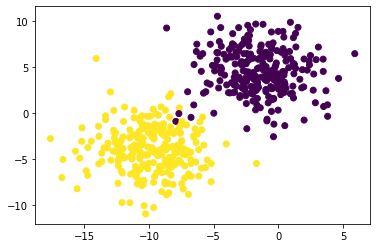

In [0]:
# lo visualizamos
plt.scatter(X[:, 0], X[:, 1], c=y[:, 0])

In [0]:
# shape de X
X.shape

(500, 2)

In [0]:
# incluímos la columna de bias para poder realizar los cálculos de forma 
# eficiente (bias trick)
X = np.c_[X, np.ones((X.shape[0]))]

In [0]:
# veamos las dimensiones de X
X.shape

(500, 3)

In [0]:
# partimos en training y testing
(train_X, test_X, train_Y, test_Y) = train_test_split(X, y, test_size=0.3, random_state=1)

In [0]:
# veamos los tamaños
train_X.shape

(350, 3)

In [0]:
train_Y.shape

(350, 1)

In [0]:
test_X.shape

(150, 3)

In [0]:
test_Y.shape

(150, 1)

In [0]:
# inicializamos nuestra matriz de pesos de forma aleatoria y el vector de 
# históricos de pérdidas
W = np.random.randn(X.shape[1], 1)
losses = []
print(W)

[[-0.96418793]
 [-0.53384948]
 [ 0.7176862 ]]


In [0]:
# y empezamos con el FORWARD PROPAGATION

# como ya sabéis, es un proceso iterativo, en el que poco a poco se van 
# actualizando los pesos usando el gradient descent para llegar a una mejor
# solución => épocas

n_epochs = 100
for epoch in np.arange(0, n_epochs):

  # calculamos las predicciones que da nuestra red con sus pesos actuales
  preds = sigmoid_activation(train_X.dot(W))

  # calculamos el error con respecto a las etiquetas
  error = preds - train_Y

  # definimos la función de pérdidas: en este caso, el error cuadrático
  # hay una gran variedad de funciones de pérdidas distintas que iremos viendo
  loss = np.sum(error ** 2)

  # añadimos nuestra pérdida al vector histórico de pérdidas
  losses.append(loss)

  # y comencamos con el BACK PROPAGATION
  gradient = train_X.T.dot(error)

  # ahora actualizamos nuestros pesos
  # pero primero, definimos nuestro learning rate
  learning_rate = 0.01
  W += -learning_rate * gradient
  
  # escribimos por pantalla cómo va el asunto
  print("[{}] loss: {}".format(epoch, loss))
  
# en cuanto acaba de entrenar, vemos lo que ha estudiado nuestra red
preds = predict(test_X, W)
print(classification_report(test_Y, preds))

[0] loss: 62.0842566300914
[1] loss: 90.01170191418879
[2] loss: 45.91055574126384
[3] loss: 22.83052740358647
[4] loss: 18.61057003644529
[5] loss: 15.74223001407444
[6] loss: 13.087105097455826
[7] loss: 12.067753275333049
[8] loss: 10.925595414653795
[9] loss: 9.965370923917648
[10] loss: 9.178532718007311
[11] loss: 8.53052940923789
[12] loss: 8.347002575902192
[13] loss: 8.534711178419517
[14] loss: 8.892913982126082
[15] loss: 9.164951066087136
[16] loss: 9.365351492837222
[17] loss: 9.466803745487098
[18] loss: 9.511175871577567
[19] loss: 9.524302586751721
[20] loss: 9.516649003363511
[21] loss: 9.496702932088194
[22] loss: 9.470068532185957
[23] loss: 9.439588328083511
[24] loss: 9.406484460537005
[25] loss: 9.37118200046869
[26] loss: 9.333734935401573
[27] loss: 9.294022170976099
[28] loss: 9.251833144617645
[29] loss: 9.206904283385635
[30] loss: 9.158934554462824
[31] loss: 9.10759265874711
[32] loss: 9.05252141576723
[33] loss: 8.99334185291582
[34] loss: 8.92965820657414

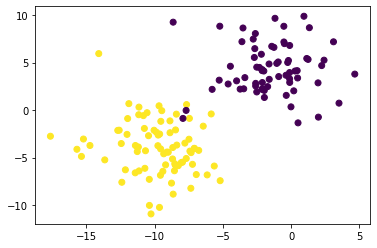

In [0]:
# y ahora algo que os recomiendo que hagáis siempre que podáis, comprobar 
# vuestras entradas, las predicciones y la curva de pérdidas
plt.scatter(test_X[:, 0], test_X[:, 1], c=test_Y[:,0])

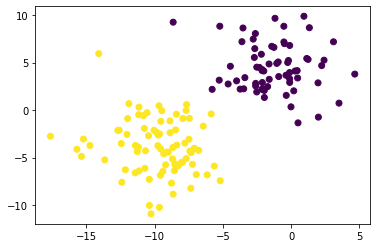

In [0]:
# veámoslo ahora con las predicciones
plt.scatter(test_X[:, 0], test_X[:, 1], c=preds[:,0])

Text(0, 0.5, 'Loss')

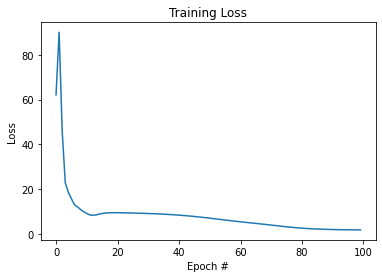

In [0]:
# veamos nuestra curva de pérdidas
plt.plot(np.arange(0, n_epochs), losses)
plt.title("Training Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")

## ¿Qué os parece? 

### ¡¡¡Acabáis de implementar el gradient descent en una red neuronal!!!

<img src="https://image.ibb.co/gHQ30o/baby_party.gif" alt="baby_party" border="0">

## 2.3 Implementación del Gradient Descent en una Red Neuronal con TensorFlow

Os acordáis del MNIST? Es el dataset de imágenes monocromas de 28x28 píxels de dígitos del 0 al 9:

<img src="https://image.ibb.co/gkZAD8/mnist.jpg" alt="mnist" border="0" height="200">

Vamos a implementar una red capaz de clasificarlos, a ver a que precisión somos capaces de llegar!

In [0]:
# Seleccionamos la version 1.x de TF
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [0]:
# imports necesarios
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
# importamos el dataset MNIST y cargamos los datos
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from t

In [0]:
# parámetros
learning_rate = 0.01
n_epochs = 100
batch_size = 100

In [0]:
# creamos los contenedores para nuestras entradas y salidas
x = tf.placeholder(tf.float32, [None, 784]) # imágenes del mnist: 28*28=784
y = tf.placeholder(tf.float32, [None, 10]) # número indicando la clase 0-9 => 10 clases

# y creamos las variables W y b para el entrenamiento
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

# por último, construimos el modelo
pred = tf.nn.softmax(tf.matmul(x, W) + b)

In [0]:
# ahora, definimos nuestra función de pérdidas: esta vez, la cros-entropía
# no os preocupéis, la veremos en detalle en la próxima sesión
# a veces la llaman loss, a veces cost => es lo mismo
cost = tf.reduce_mean(-tf.reduce_sum(y*tf.log(pred), axis=1))

# calculamos los gradientes (gradient descent)
grad_W, grad_b = tf.gradients(xs=[W, b], ys=cost)

# definimos las operaciones para actualizar los pesos con los gradientes calculados
# y el learning rate
new_W = W.assign(W - learning_rate * grad_W)
new_b = b.assign(b - learning_rate * grad_b)

# inicializamos las variables
init = tf.global_variables_initializer()

# para almacenar el histórico de costes
costs = []
# empezamos la sesión
with tf.Session() as sess:
    sess.run(init)

    # entrenamiento de nuestra red
    for epoch in range(n_epochs):
        avg_cost = 0.
        total_batch = int(mnist.train.num_examples/batch_size)
        
        # y si en vez de actualizar los pesos para cada imagen, lo hacemos
        # de X en X imágenes?
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            
            # ejecutamos la optimización
            _, _, c = sess.run([new_W, new_b ,cost], feed_dict={x: batch_xs,
                                                       y: batch_ys})
            
            # calculamos el coste teniendo en cuenta los batches que hay
            avg_cost += c / total_batch
            
        # guardamos nuestro coste en el histórico
        costs.append(avg_cost)
        
        # imprimimos las iteraciones
        print("[{}] cost: {}".format(epoch, avg_cost))

    print("Entrenamiento finalizado!!")

    # comprobamos lo que ha aprendido nuestra red
    correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
    
    # calculamos el accuracy (precisión)
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    print("Accuracy:", accuracy.eval({x: mnist.test.images, y: mnist.test.labels}))

[0] cost: 1.184197739579461
[1] cost: 0.6653986339135599
[2] cost: 0.5528391605615612
[3] cost: 0.49871703700585807
[4] cost: 0.4655826383829115
[5] cost: 0.44264141391624134
[6] cost: 0.4255330610275264
[7] cost: 0.4122015418518672
[8] cost: 0.4014135160771285
[9] cost: 0.3924063948609613
[10] cost: 0.3847767041488126
[11] cost: 0.37814141612161306
[12] cost: 0.3724341053041546
[13] cost: 0.3672326168417931
[14] cost: 0.3626941881396557
[15] cost: 0.3586060452732171
[16] cost: 0.35487761714241706
[17] cost: 0.3514335359226571
[18] cost: 0.3483513711528349
[19] cost: 0.3454161682995882
[20] cost: 0.3427561759135941
[21] cost: 0.3402622588927096
[22] cost: 0.33794751245867105
[23] cost: 0.33575772998007897
[24] cost: 0.3337333393096927
[25] cost: 0.3317790571261535
[26] cost: 0.3299480312791738
[27] cost: 0.3281904641877524
[28] cost: 0.3266137502952057
[29] cost: 0.3250320746140045
[30] cost: 0.3235833324898371
[31] cost: 0.3221899581226437
[32] cost: 0.3208166631514379
[33] cost: 0.31

Text(0, 0.5, 'Loss')

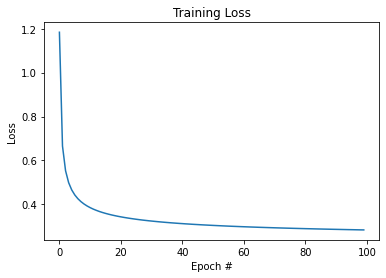

In [0]:
# veamos nuestra función de pérdidas con respecto a las épocas ejecutadas
plt.plot(np.arange(0, n_epochs), costs)
plt.title("Training Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")

#¿Y cómo haríamos esto con TF 2.0? ¡Veamoslo!

In [0]:
# Seleccionamos la version 2.x de TF
%tensorflow_version 2.x

In [0]:
# imports necesarios
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [0]:
# parámetros
learning_rate = 0.01
n_epochs = 100
batch_size = 100

In [0]:
# cargamos el dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

Comprobamos cómo es el dataset que hemos cargado y si necesita normalización:

In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
x_test.shape

(10000, 28, 28)

In [7]:
x_train.max()

255

In [8]:
x_test.max()

255

In [0]:
# vamos a normalizar entre 0 y 1
x_train = x_train / 255.
x_test = x_test / 255.

In [10]:
print(x_train.max())
print(x_test.max())

1.0
1.0


También necesitamos convertir las imágenes a vectores, porque aún no hemos visto cómo podemos implementar un modelo que trabaje con imágenes. Vamos a ver cómo lo hacemos:

In [11]:
x_train = tf.reshape(x_train, shape=(60000, -1))
print(x_train)

tf.Tensor(
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], shape=(60000, 784), dtype=float64)


In [12]:
x_test = tf.reshape(x_test, shape=(10000, -1))
print(x_test)

tf.Tensor(
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], shape=(10000, 784), dtype=float64)


Hecho! Nuestros datos ya están en formato `[N_instancias, variables]` (60000 instancias, 784 (28+28) pixels).

Ahora, debemos fijarnos en el formato de nuestras etiquetas, que en este caso tendrán que estar codificadas en one-hot. De lo contrario, obtendremos un error tan bonito como este:



```
---------------------------------------------------------------------------
InvalidArgumentError                      Traceback (most recent call last)
<ipython-input-43-4d4399931cbf> in <module>()
     20         # no os preocupéis, la veremos en detalle en la próxima sesión
     21         # a veces la llaman loss, a veces cost => es lo mismo
---> 22         cost = tf.reduce_mean(-tf.reduce_sum(batch_ys*tf.math.log(pred), axis=1))
     23 
     24         # calculamos los gradientes (gradient descent)

4 frames
/usr/local/lib/python3.6/dist-packages/six.py in raise_from(value, from_value)

InvalidArgumentError: Incompatible shapes: [100] vs. [100,10] [Op:Mul]
```



Vamos a ver cómo hacerlo:

In [13]:
print(y_train.shape)
print(y_test.shape)

(60000,)
(10000,)


In [14]:
# convertimos las etiquetas a one-hot
y_train = tf.one_hot(y_train, depth=10)
y_test = tf.one_hot(y_test, depth=10)

print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


Ya las tenemos codificadas como one-hot :)

Por último, debemos fijarnos en los tipos de datos con los que estamos trabajando. TF exige que los tipos coincidan, si no, se queja :(

In [15]:
print(x_train.dtype)
print(x_test.dtype)
print(y_train.dtype)
print(y_test.dtype)

<dtype: 'float64'>
<dtype: 'float64'>
<dtype: 'float32'>
<dtype: 'float32'>


In [0]:
# convertimos las etiquetas a float64
y_train = tf.cast(y_train, 'float64')
y_test = tf.cast(y_test, 'float64')

In [17]:
print(x_train.dtype)
print(x_test.dtype)
print(y_train.dtype)
print(y_test.dtype)

<dtype: 'float64'>
<dtype: 'float64'>
<dtype: 'float64'>
<dtype: 'float64'>


¡Perfecto! Ahora sí que estamos preparados. Si no hubieramos hecho esta conversión, hubieramos obtenido un error como este:



```
---------------------------------------------------------------------------
InvalidArgumentError                      Traceback (most recent call last)
<ipython-input-38-4d4399931cbf> in <module>()
     20         # no os preocupéis, la veremos en detalle en la próxima sesión
     21         # a veces la llaman loss, a veces cost => es lo mismo
---> 22         cost = tf.reduce_mean(-tf.reduce_sum(batch_ys*tf.math.log(pred), axis=1))
     23 
     24         # calculamos los gradientes (gradient descent)

4 frames
/usr/local/lib/python3.6/dist-packages/six.py in raise_from(value, from_value)

InvalidArgumentError: cannot compute Mul as input #1(zero-based) was expected to be a uint8 tensor but is a double tensor [Op:Mul]
```



Nos creamos ahora el iterador para que recorra nuestro dataset. Podéis leer más sobre `tf.data` aquí: https://www.tensorflow.org/guide/data

In [0]:
train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_ds = train_ds.shuffle(10000).batch(batch_size)

# para el conjunto de test no vamos a necesitar el dataloader porque
# no vamos a procesar los datos por batches, sino todos a la vez, así 
# que utilizaremos x_test y y_test. 
# Si fuesemos a procesarlo por batches, se haría así:
# test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test))
# test_ds = test_ds.batch(batch_size)

In [19]:
# cuantas iteraciones habrá por época? 
# en una época se tienen que ver todos los elementos del dataset, y estamos
# pasándole los elementos de 100 en 100, así que habrá 60000 / 100 = 600 épocas
total_batch = x_train.shape[0] // batch_size
print(total_batch)

600


In [21]:
# y creamos las variables W y b para el entrenamiento
W = tf.zeros([784, 10], tf.double)
b = tf.zeros([10], tf.double)

# para almacenar el histórico de costes
costs = []
# entrenamiento de nuestra red
for epoch in range(n_epochs):
    avg_cost = 0.
    
    # y si en vez de actualizar los pesos para cada imagen, lo hacemos
    # de X en X imágenes?
    for batch_xs, batch_ys in train_ds:
        # empezamos con la optimización
  
        # haremos uso de tf.GradientTape, que lleva un control de las variables
        # para poder calcular sus gradientes
        with tf.GradientTape() as tape:
            # le indicamos que "vigile" las variables a optimizar
            tape.watch(W)
            tape.watch(b)
            
            # ejecutamos el modelo
            pred = tf.nn.softmax(tf.matmul(batch_xs, W) + b)

            # ahora, definimos nuestra función de pérdidas: esta vez, la cros-entropía
            # no os preocupéis, la veremos en detalle en la próxima sesión
            # a veces la llaman loss, a veces cost => es lo mismo
            cost = tf.reduce_mean(-tf.reduce_sum(batch_ys*tf.math.log(pred), axis=1))

            # calculamos los gradientes (gradient descent)
            grad_W, grad_b = tape.gradient(cost, [W, b])

            # definimos las operaciones para actualizar los pesos con los gradientes calculados
            # y el learning rate
            W = W - learning_rate * grad_W
            b = b - learning_rate * grad_b

        # calculamos el coste teniendo en cuenta los batches que hay
        avg_cost += cost / total_batch
        
    # guardamos nuestro coste en el histórico
    costs.append(avg_cost)
    
    # imprimimos las iteraciones
    print("[{}] cost: {}".format(epoch, avg_cost))

print("Entrenamiento finalizado!!")

[0] cost: 1.1450941390865375
[1] cost: 0.6415096898138971
[2] cost: 0.5355837710167335
[3] cost: 0.4845332323571625
[4] cost: 0.45319645180624746
[5] cost: 0.4314365300482146
[6] cost: 0.4152530186045151
[7] cost: 0.40263637394243545
[8] cost: 0.39238889398990257
[9] cost: 0.3837800696887018
[10] cost: 0.3765510331160333
[11] cost: 0.37029497785447585
[12] cost: 0.3647834284620615
[13] cost: 0.35997513091599026
[14] cost: 0.3555923726722694
[15] cost: 0.3517032376936067
[16] cost: 0.34816988825837153
[17] cost: 0.3448538578813758
[18] cost: 0.34186304384793537
[19] cost: 0.33909829242961514
[20] cost: 0.3365539235787825
[21] cost: 0.3341885751536318
[22] cost: 0.3319983939519172
[23] cost: 0.3299494992220244
[24] cost: 0.327968964911204
[25] cost: 0.3261531096766181
[26] cost: 0.32444758416525565
[27] cost: 0.322758534756031
[28] cost: 0.3211856862382224
[29] cost: 0.31973697430587
[30] cost: 0.3183333019858937
[31] cost: 0.31701369728972145
[32] cost: 0.31569882937741073
[33] cost: 0.

In [23]:
# comprobamos lo que ha aprendido nuestra red
pred = tf.nn.softmax(tf.matmul(x_test, W) + b)
correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y_test, 1))

# calculamos el accuracy (precisión)
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print("Accuracy:", accuracy.numpy())

Accuracy: 0.9225


Text(0, 0.5, 'Loss')

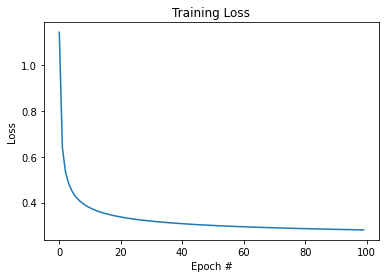

In [24]:
# veamos nuestra función de pérdidas con respecto a las épocas ejecutadas
plt.plot(np.arange(0, n_epochs), costs)
plt.title("Training Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")

¡Ahí lo tenéis! Hemos llegado al mismo sitio de una forma más "sencilla e intuitiva".

Seguramente os estéis preguntando por qué va más lento que con TF1.x, verdad? Bueno, esto se debe a varias causas, pero la principal es que en TF 1.x al definir el grafo se realizan determinadas optimizaciones que permiten una ejecución más rápida.

Para los interesados os recomiendo que leáis esto: https://stackoverflow.com/questions/58441514/why-is-tensorflow-2-much-slower-than-tensorflow-1


## Y esto es todo amigos!!

<img src="https://image.ibb.co/jZEXD8/thats_all_folks.gif" alt="thats_all_folks" border="0">

Mañana veremos todo lo relacionado con el proceso de aprendizaje de las NN: los diferentes tipos de gradient descent, las funciones de pérdidas y activacion, el learning rate, el batch size, y la normalización.

## Así que cargad las pilas!! ;-)